In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [24]:
Energia = pd.read_csv('T1.csv')
Energia.columns = ['Registro', 'Potência (kW)', 'Vento (m/s)', 'Curva_Teórica (KWh)', 'Direção_Vento (°)']
Energia.drop(columns='Direção_Vento (°)', inplace=True)
Energia['Registro'] = pd.to_datetime(Energia['Registro'])
display(Energia)

,Registro,Potência (kW),Vento (m/s),Curva_Teórica (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


2. Plotar os dados

<Axes: xlabel='Vento (m/s)', ylabel='Potência (kW)'>

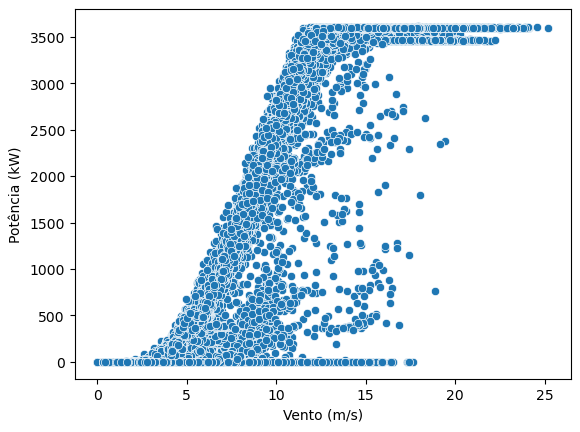

In [25]:
sns.scatterplot(data=Energia, x='Vento (m/s)', y='Potência (kW)')


3. Curva Ideal

<Axes: xlabel='Vento (m/s)', ylabel='Curva_Teórica (KWh)'>

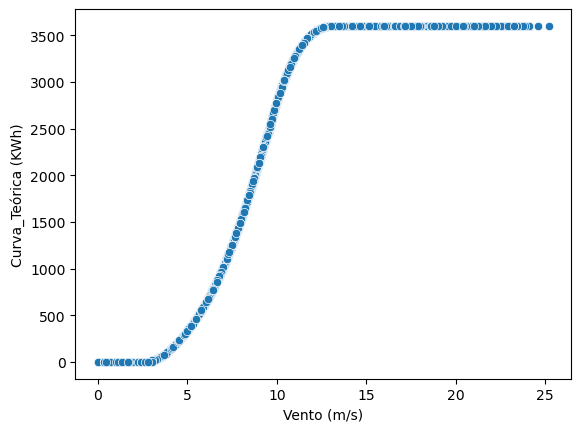

In [27]:
sns.scatterplot(data=Energia, x='Vento (m/s)', y='Curva_Teórica (KWh)')


4. Limite Aceitável

In [69]:
pot_real = Energia['Potência (kW)'].to_list()
pot_teorica = Energia['Curva_Teórica (KWh)'].to_list()
pot_max = [pot * 1.05 for pot in pot_teorica]
pot_min = [pot * 0.95 for pot in pot_teorica]
dentro_lim = ['Dentro' if pot_max[p]>=pot>=pot_min[p] 
              else 'Zero' if pot==0 
              else 'Fora' 
              for p, pot in enumerate(pot_real)]

print(dentro_lim.count('Dentro')/len(dentro_lim))

0.37286760340391845


5. Adicionando coluna dentro_lim

In [72]:
Energia['DentroLim'] = dentro_lim
display(Energia)

,Registro,Potência (kW),Vento (m/s),Curva_Teórica (KWh),DentroLim
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


6. Criando o gráfico novamente

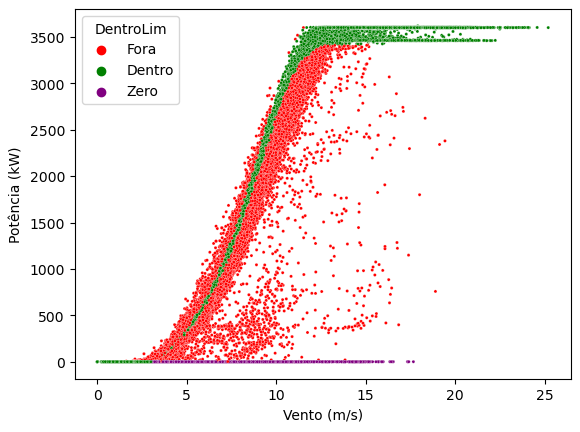

In [73]:
cores = {'Dentro': 'Green', 'Fora': 'Red', 'Zero': 'Purple'}
grafico = sns.scatterplot(data=Energia, x='Vento (m/s)', y='Potência (kW)', hue='DentroLim',s=5, palette=cores)

In [74]:
Energia.describe()

,Potência (kW),Vento (m/s),Curva_Teórica (KWh)
count,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463
std,1312.459242,4.227166,1368.018238
min,-2.471405,0.000000,0.000000
25%,50.677890,4.201395,161.328167
50%,825.838074,7.104594,1063.776283
75%,2482.507568,10.300020,2964.972462
max,3618.732910,25.206011,3600.000000


In [76]:
Energia.duplicated().sum()

0